- Gabungin RIASEC
- Gabungin VCL
- Capping Outliers
- Clustering
- Oversample mungkin?
- Modelling 
- Sace Model

- coba cluster dulu baru outliers 
1. Drop Outliers RIASEC only = 0,70
2. Drop Outliers RIASEC and TIPI only = 0,738

- coba gabungin tipi

In [1]:
import pandas as pd

In [2]:
# DATA GATHERING (TOP 50 MAJORS)
trainraw_df = pd.read_csv("data/preprocessed_data.csv", delimiter=',')

In [3]:
# List of columns to drop
columns_to_drop = ['R3', 'I3', 'A7', 'S2', 'E2', 'C4', 'R5', 'I6', 'A1', 'S4', 'E6', 'C1', 'VCL9', 'VCL7', 'VCL8', 'VCL16', 'surveyelapse', 'testelapse', 'introelapse', 'source', 'uniqueNetworkLocation', 'hand', 'age', 'familysize', 'urban', 'race', 'married', 'orientation']

# Drop the columns
trainraw_df = trainraw_df.drop(columns=columns_to_drop)

print(trainraw_df)
print(trainraw_df.columns)
print(trainraw_df.shape)

       R1  R2  R4  R6  R7  R8  I1  I2  I4  I5  ...  VCL12  VCL13  VCL14  \
0       1   1   4   2   2   1   5   5   4   4  ...      0      1      1   
1       1   4   4   4   1   2   4   4   1   2  ...      0      1      0   
2       4   2   2   2   3   2   2   2   2   2  ...      0      0      0   
3       1   1   2   1   1   1   3   3   4   3  ...      0      1      1   
4       5   3   3   3   3   3   5   5   3   3  ...      0      0      1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...    ...   
64374   5   5   4   5   3   5   5   4   5   4  ...      0      1      1   
64375   3   2   4   3   3   2   5   4   4   5  ...      0      0      1   
64376   2   1   1   1   1   2   2   3   2   3  ...      0      1      1   
64377   1   1   1   1   1   4   4   1   1   4  ...      0      0      1   
64378   2   4   4   3   1   4   4   4   5   4  ...      0      1      1   

       VCL15  education  gender  engnat  religion  voted                major  
0          1       

---
---
## Capping Outliers
---
---

### RIASEC
### (MenjaDikan major yang memiliki RIASEC < 1 = 1 dan RIASEC > 5 = 5 )

In [4]:
columns = ['R1', 'R2', 'R4', 'R6', 'R7', 'R8']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (5 if x > 5 else x))

In [5]:
columns = ['I1', 'I2', 'I4', 'I5', 'I7', 'I8']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (5 if x > 5 else x))

In [6]:
columns = ['A2', 'A3', 'A4', 'A5', 'A6', 'A8']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (5 if x > 5 else x))

In [7]:
columns = ['S1', 'S3', 'S5', 'S6', 'S7', 'S8']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (5 if x > 5 else x))

In [8]:
columns = ['E1', 'E3', 'E4', 'E5', 'E7', 'E8']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (5 if x > 5 else x))

In [9]:
columns = ['C2', 'C3', 'C5', 'C6', 'C7', 'C8']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (5 if x > 5 else x))

### TIPI
### (MenjaDikan major yang memiliki TIPI < 1 = 1 dan TIPI > 7 = 7 )

In [10]:
columns = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (7 if x > 7 else x))

### VCL
### (MenjaDikan major yang memiliki VCL < 0 = 0 dan VCL > 1 = 1 )

In [11]:
columns = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 0 if x < 0 else (1 if x > 1 else x))

### education
### (MenjaDikan major yang memiliki education < 1 = 1 dan VCL > 4 = 4 )

In [12]:
columns = ['education']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (4 if x > 4 else x))

### Gender
### (MenjaDikan major yang memiliki gender < 1 = 1 dan gender > 3 = 3 )

In [13]:
columns = ['gender']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (3 if x > 3 else x))

### engnat
### (Menjadikan major yang memiliki engant < 1 = 1 dan religion > 2 = 2 )

In [14]:
columns = ['engnat']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (2 if x > 2 else x))

### Religion
### (Menjadikan major yang memiliki religion < 1 = 1 dan religion > 12 = 12 )

In [15]:
columns = ['religion']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (12 if x > 12 else x))

### voted
### (MenjaDikan major yang memiliki voted < 1 = 1 dan voted > 2 = 2 )

In [16]:
columns = ['voted']

for col in columns:
    trainraw_df[col] = trainraw_df[col].apply(lambda x: 1 if x < 1 else (2 if x > 2 else x))

---
---
## Gabung RIASEC
---
---

In [17]:
# SUM EACH SUBTEST TO DECREASE FEATURES
trainraw_df['R'] = trainraw_df[['R1', 'R2', 'R4', 'R6', 'R7', 'R8']].sum(axis=1)/6
trainraw_df['I'] = trainraw_df[['I1', 'I2', 'I4', 'I5', 'I7', 'I8']].sum(axis=1)/6
trainraw_df['A'] = trainraw_df[['A2', 'A3', 'A4', 'A5', 'A6', 'A8']].sum(axis=1)/6
trainraw_df['S'] = trainraw_df[['S1', 'S3', 'S5', 'S6', 'S7', 'S8']].sum(axis=1)/6
trainraw_df['E'] = trainraw_df[['E1', 'E3', 'E4', 'E5', 'E7', 'E8']].sum(axis=1)/6
trainraw_df['C'] = trainraw_df[['C2', 'C3', 'C5', 'C6', 'C7', 'C8']].sum(axis=1)/6

In [18]:
# DROPING UNUSED COLUMNS
trainraw_df.drop(['R1', 'R2', 'R4', 'R6', 'R7', 'R8', 'I1', 'I2', 'I4', 'I5', 'I7', 'I8', 'A2', 'A3', 'A4', 'A5', 'A6', 'A8', 'S1', 
                  'S3', 'S5', 'S6', 'S7', 'S8', 'E1', 'E3', 'E4', 'E5', 'E7', 'E8','C2', 'C3', 'C5', 'C6', 'C7', 'C8'], axis=1, inplace=True)
print(trainraw_df.shape)

(64379, 34)


---
---
## Gabung VCL
---
---

In [19]:
# SUM EACH SUBTEST TO DECREASE FEATURES
trainraw_df['VCL'] = trainraw_df[['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15']].sum(axis=1)

In [20]:
# DROPING UNUSED COLUMNS
trainraw_df.drop(['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15'], axis=1, inplace=True)
print(trainraw_df.shape)

(64379, 23)


---
---
## Gabung TIPI
---
---

In [21]:
# SUM EACH SUBTEST TO DECREASE FEATURES
trainraw_df['TIPI'] = trainraw_df[['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']].sum(axis=1)

In [22]:
# DROPING UNUSED COLUMNS
trainraw_df.drop(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10'], axis=1, inplace=True)
print(trainraw_df.shape)

(64379, 14)


---
---
## Clustering
---
---

In [23]:
# DROP OTHERS (GAPENTING)
filtered_df1 = trainraw_df.drop(columns=['education', 'gender', 'engnat', 'religion', 'voted'])
print(filtered_df1.shape)
print(filtered_df1.columns)

(64379, 9)
Index(['major', 'R', 'I', 'A', 'S', 'E', 'C', 'VCL', 'TIPI'], dtype='object')


In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

trainbalanced_df = filtered_df1.copy()

# Step 1: Group data by Major
grouped = trainbalanced_df.groupby('major')

# Step 2: Iterate over each group
balanced_data = []
best_num_clusters = {}
min_clusters = 50

for name, group in grouped:
    print("Major:", name)
    print("Number of rows before balancing:", len(group))
    
    # Step 3: Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(group.drop('major', axis=1))
    
    # Step 4: Determine the optimal number of clusters
    max_clusters = min(len(group), 100)
    best_silhouette = -1.0
    best_cluster_count = min_clusters
    
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        group['cluster'] = kmeans.fit_predict(scaled_features)
        
        # Calculate Silhouette score
        silhouette_avg = silhouette_score(scaled_features, group['cluster'])
        
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_cluster_count = n_clusters
    
    best_num_clusters[name] = best_cluster_count
    
    # Step 5: Cluster the data with the best number of clusters
    kmeans = KMeans(n_clusters=best_cluster_count, random_state=42)
    group['cluster'] = kmeans.fit_predict(scaled_features)
    
    # Step 6: Identify outlier clusters (if needed)
    cluster_counts = group['cluster'].value_counts()
    outlier_clusters = cluster_counts[cluster_counts < cluster_counts.max()].index
    
    # Step 7: Remove outliers (if needed)
    balanced_group = group[~group['cluster'].isin(outlier_clusters)]
    balanced_data.append(balanced_group)
    
    print("Number of rows after balancing:", len(balanced_group))
    print("Best number of clusters:", best_cluster_count)
    print("--------------------------")

# Step 8: Concatenate balanced data for all majors
trainbalanced_df = pd.concat(balanced_data)

# Step 9: Optional - Reset index if needed
trainbalanced_df.reset_index(drop=True, inplace=True)

Major: administrasi bisnis
Number of rows before balancing: 1047
Number of rows after balancing: 40
Best number of clusters: 54
--------------------------
Major: akuntansi
Number of rows before balancing: 2531
Number of rows after balancing: 60
Best number of clusters: 65
--------------------------
Major: antropologi
Number of rows before balancing: 342
Number of rows after balancing: 15
Best number of clusters: 60
--------------------------
Major: arsitektur
Number of rows before balancing: 653
Number of rows after balancing: 42
Best number of clusters: 58
--------------------------
Major: bimbingan konseling
Number of rows before balancing: 1062
Number of rows after balancing: 36
Best number of clusters: 61
--------------------------
Major: biologi
Number of rows before balancing: 2431
Number of rows after balancing: 84
Best number of clusters: 51
--------------------------
Major: desain grafis
Number of rows before balancing: 306
Number of rows after balancing: 15
Best number of clu

---
---
## Delete Outliers Using BoxPlot
---
---

## RIASEC

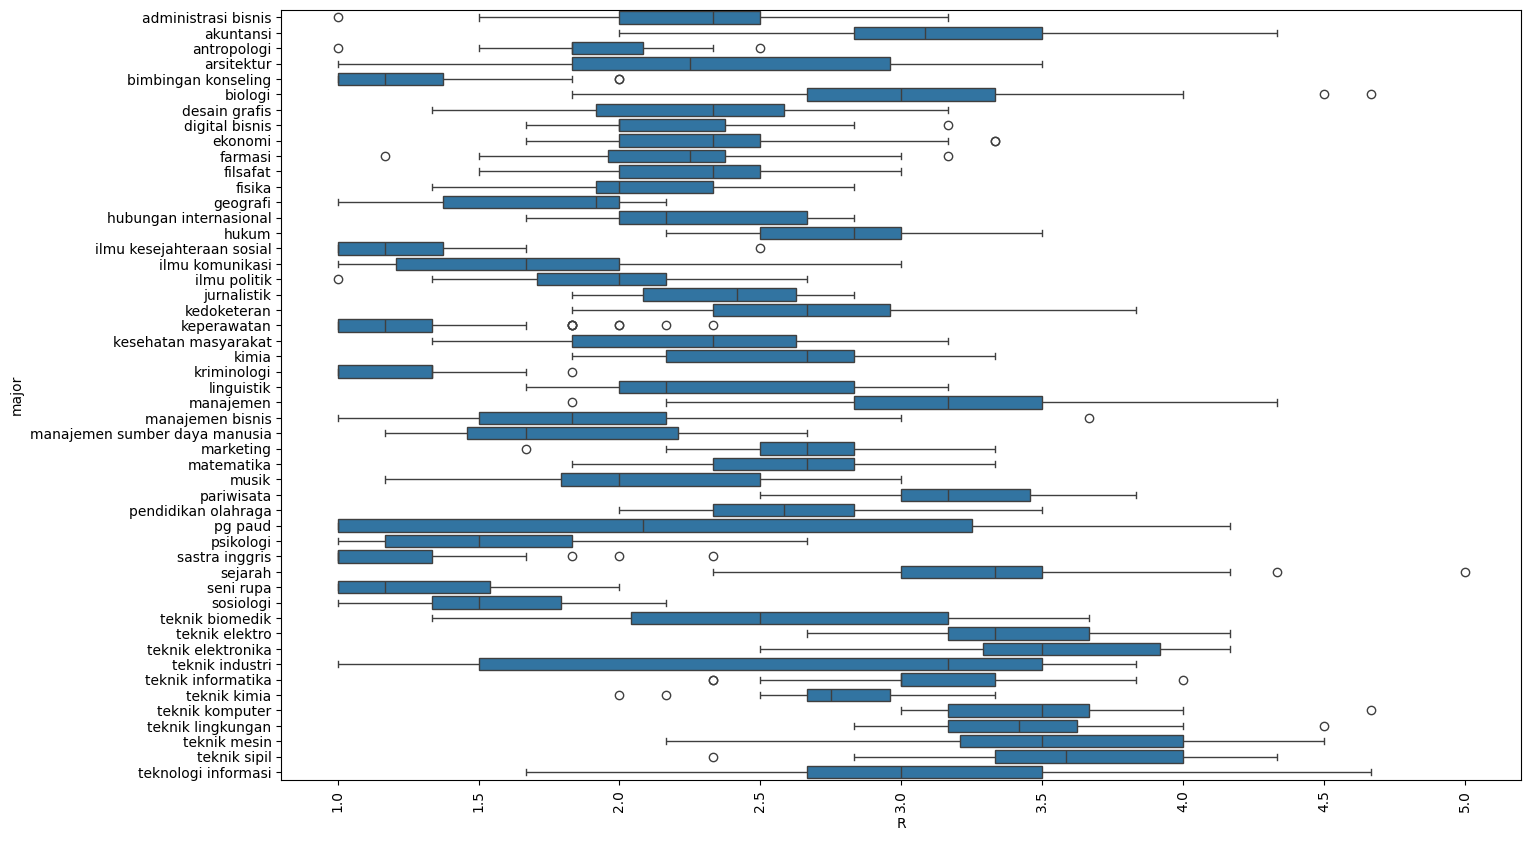

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.boxplot(x='R', y='major', data=trainbalanced_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\Ngurah Ervan\AppData\Local\Temp\ipykernel_16360\3137709216.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = trainbalanced_df.groupby('major').apply(remove_outliers).reset_index(drop=True)


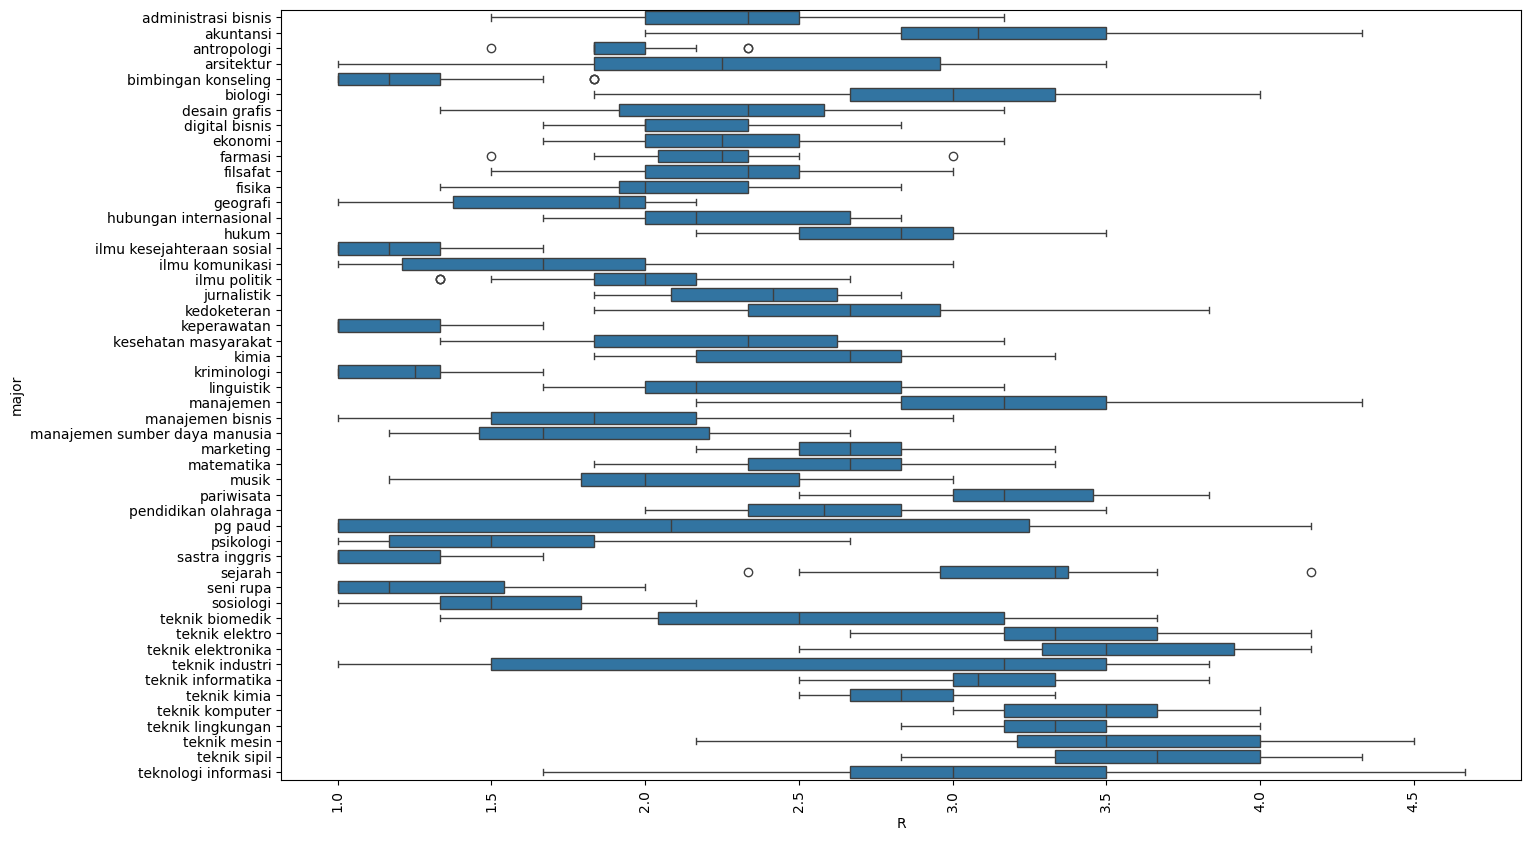

(2014, 10)


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers(df):
    Q1 = df['R'].quantile(0.25)
    Q3 = df['R'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df['R'] >= Q1 - 1.5 * IQR) & (df['R'] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

filtered_df = trainbalanced_df.groupby('major').apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.boxplot(x='R', y='major', data=filtered_df)
plt.xticks(rotation=90)
plt.show()
print(filtered_df.shape)

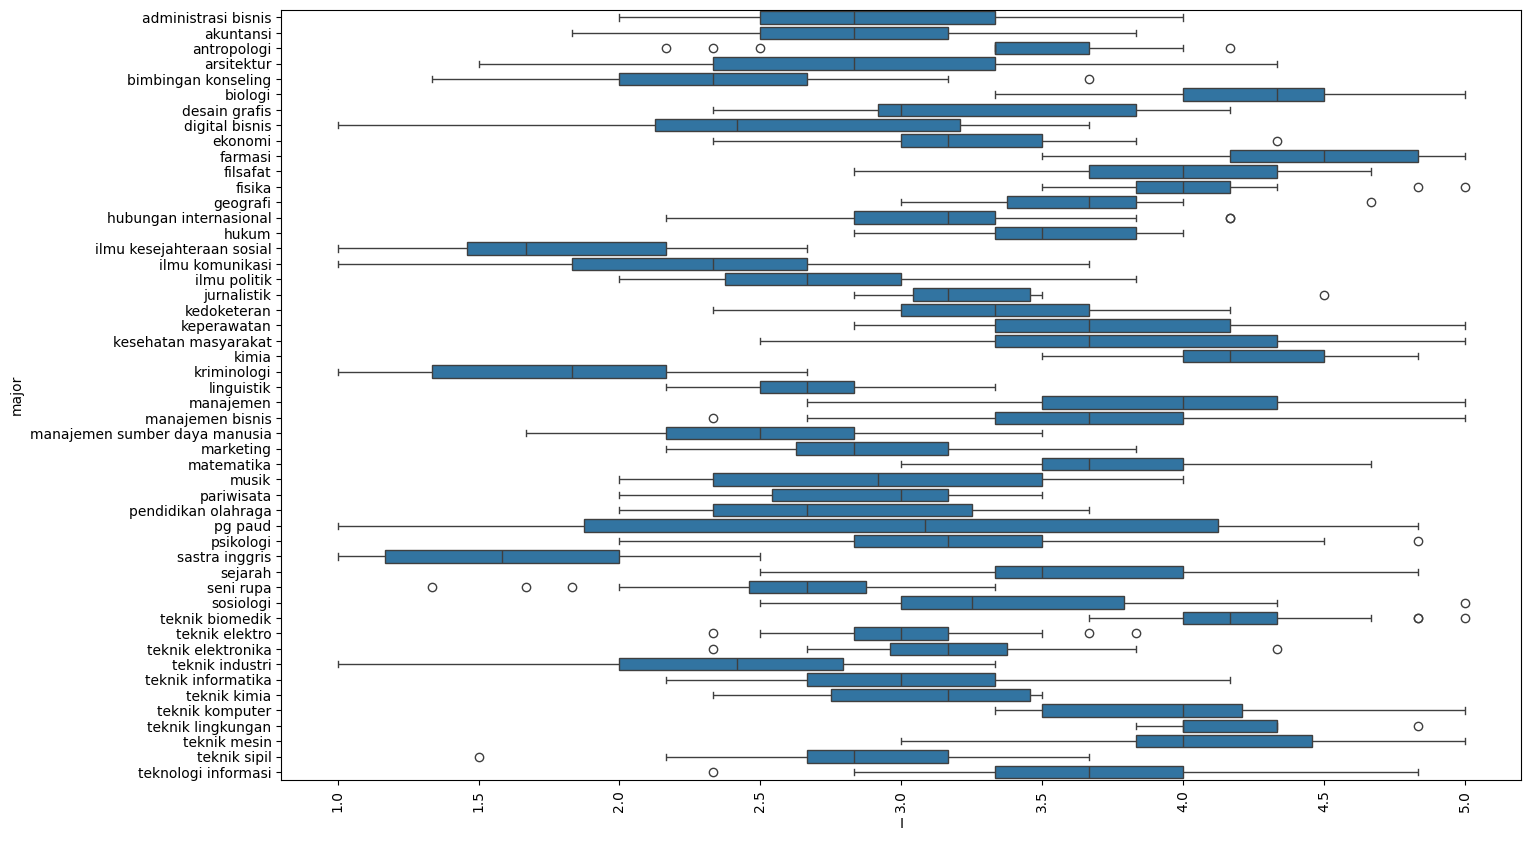

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.boxplot(x='I', y='major', data=trainbalanced_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\Ngurah Ervan\AppData\Local\Temp\ipykernel_16360\1667714668.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)


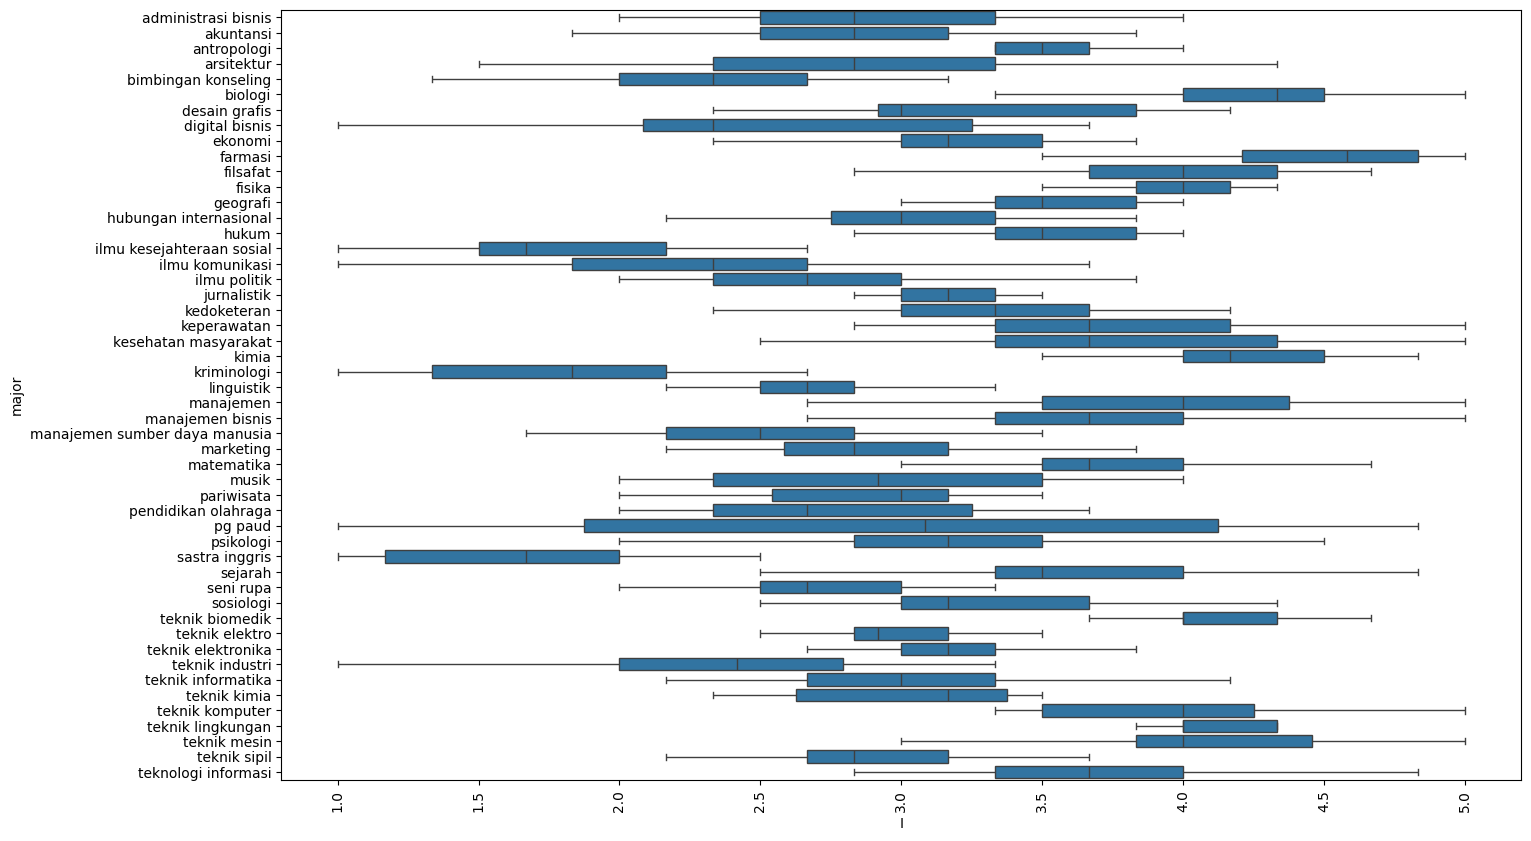

(1987, 10)


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers(df):
    Q1 = df['I'].quantile(0.25)
    Q3 = df['I'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df['I'] >= Q1 - 1.5 * IQR) & (df['I'] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.boxplot(x='I', y='major', data=filtered_df)
plt.xticks(rotation=90)
plt.show()
print(filtered_df.shape)

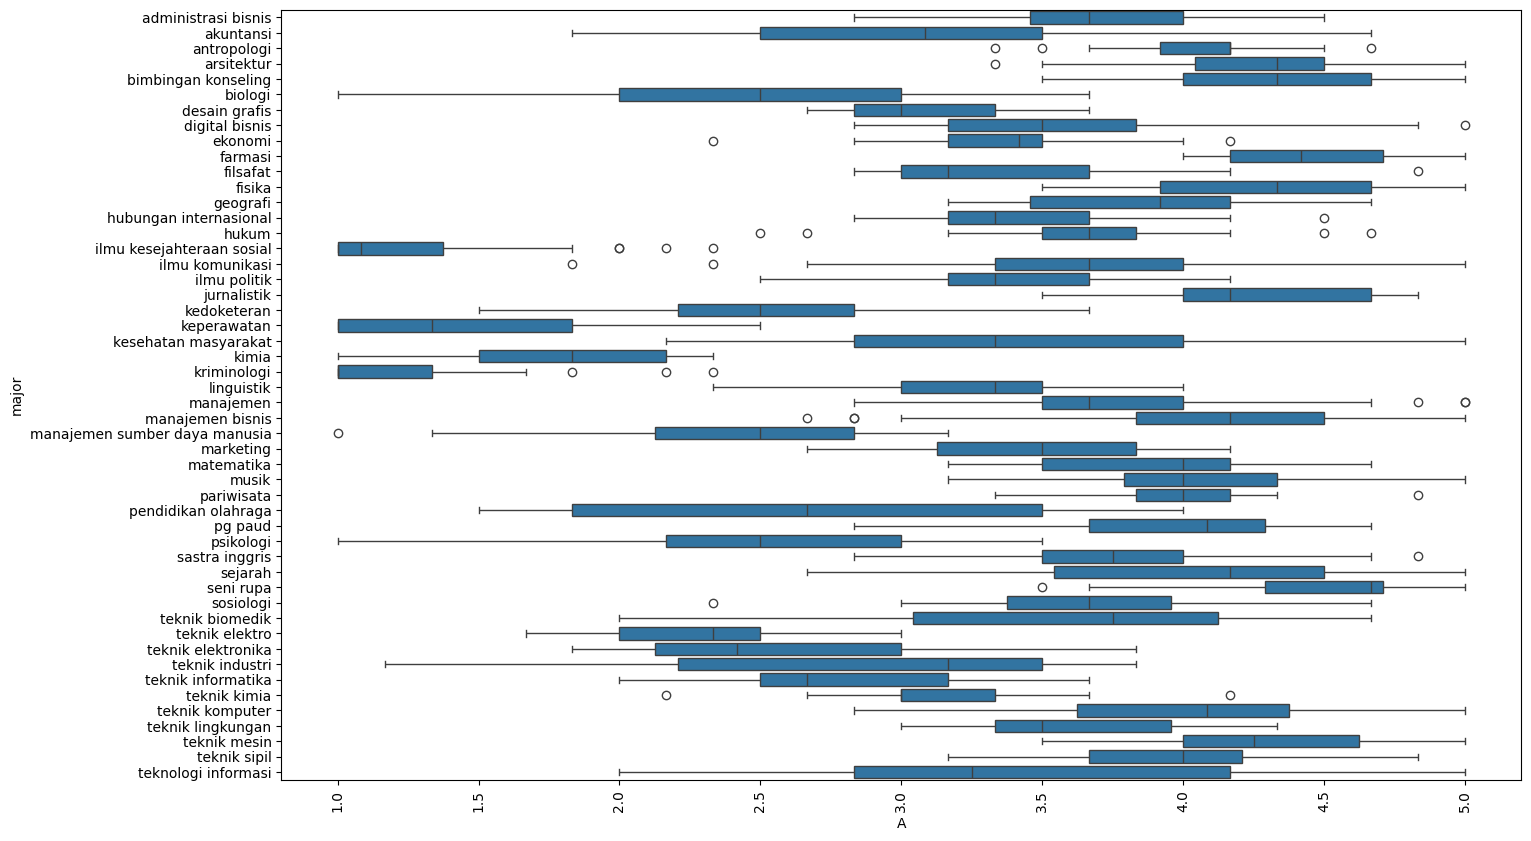

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.boxplot(x='A', y='major', data=trainbalanced_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\Ngurah Ervan\AppData\Local\Temp\ipykernel_16360\2235604660.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)


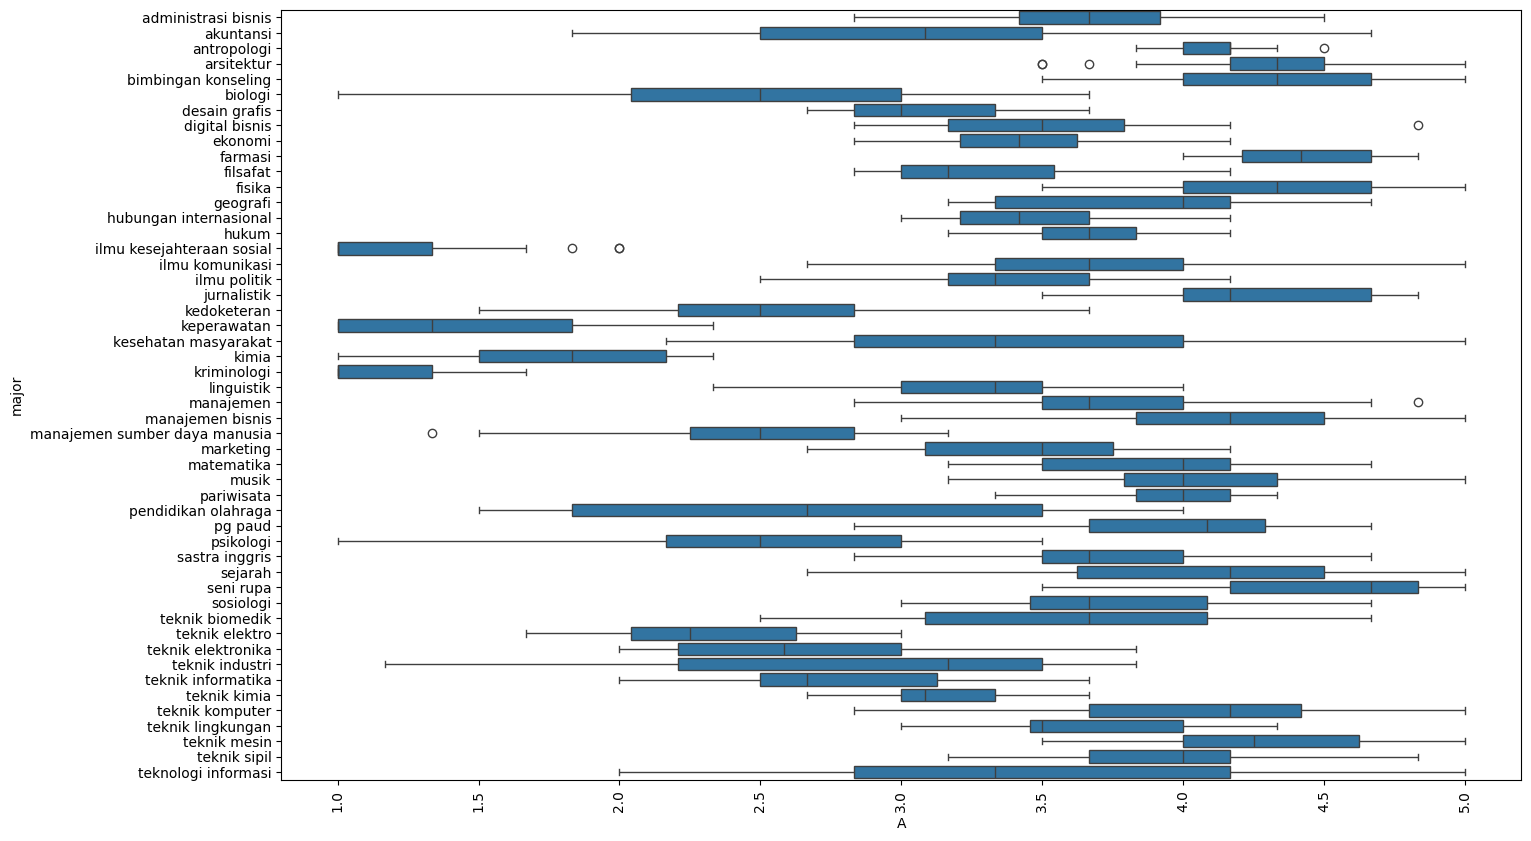

(1959, 10)


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers(df):
    Q1 = df['A'].quantile(0.25)
    Q3 = df['A'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df['A'] >= Q1 - 1.5 * IQR) & (df['A'] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.boxplot(x='A', y='major', data=filtered_df)
plt.xticks(rotation=90)
plt.show()
print(filtered_df.shape)

C:\Users\Ngurah Ervan\AppData\Local\Temp\ipykernel_16360\1216274760.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)


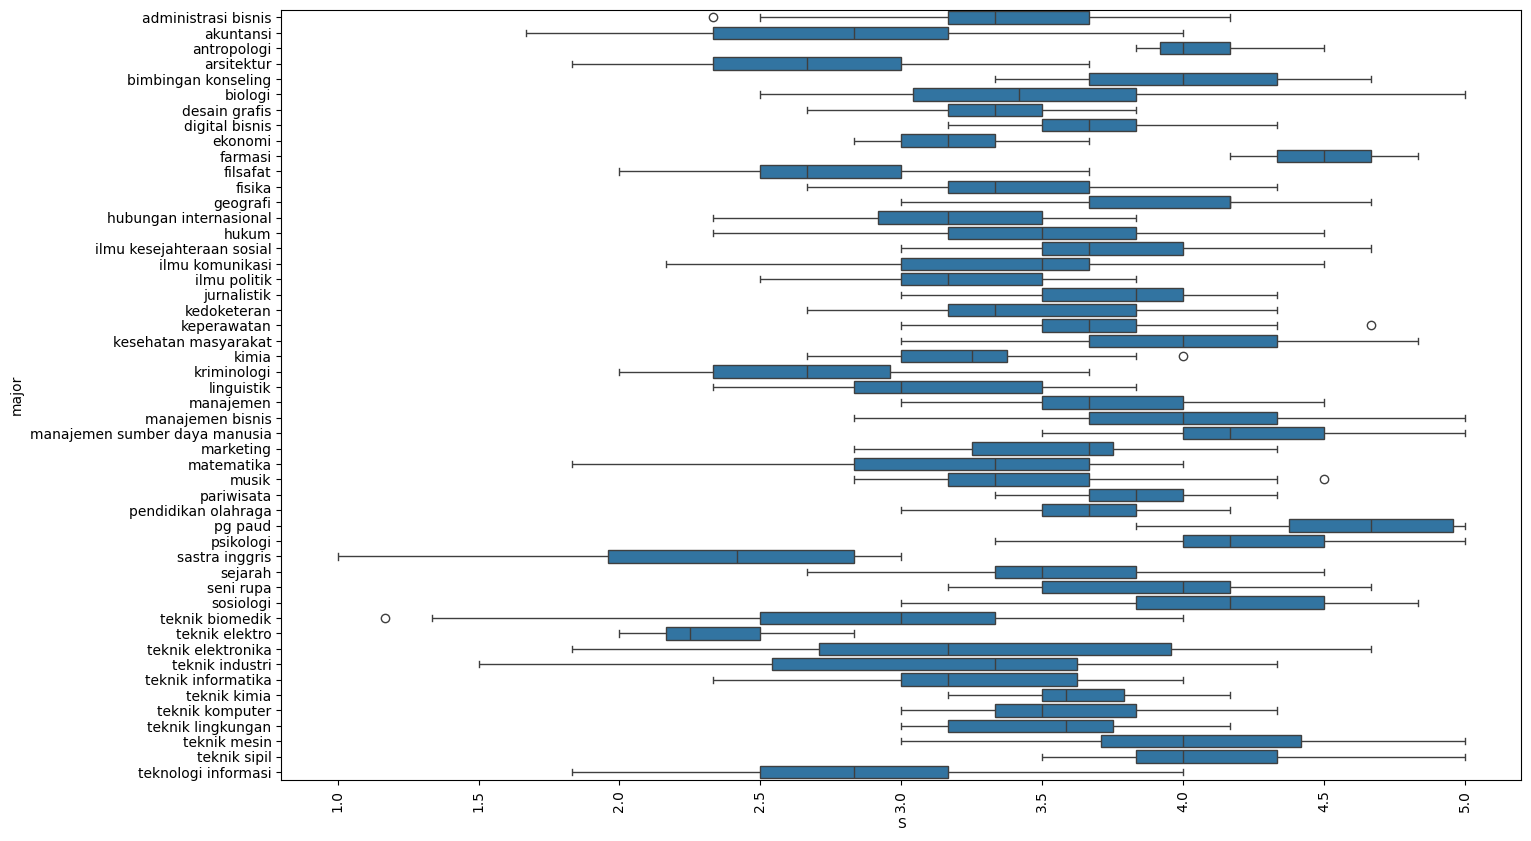

(1931, 10)


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers(df):
    Q1 = df['S'].quantile(0.25)
    Q3 = df['S'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df['S'] >= Q1 - 1.5 * IQR) & (df['S'] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.boxplot(x='S', y='major', data=filtered_df)
plt.xticks(rotation=90)
plt.show()
print(filtered_df.shape)

C:\Users\Ngurah Ervan\AppData\Local\Temp\ipykernel_16360\4272353515.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)


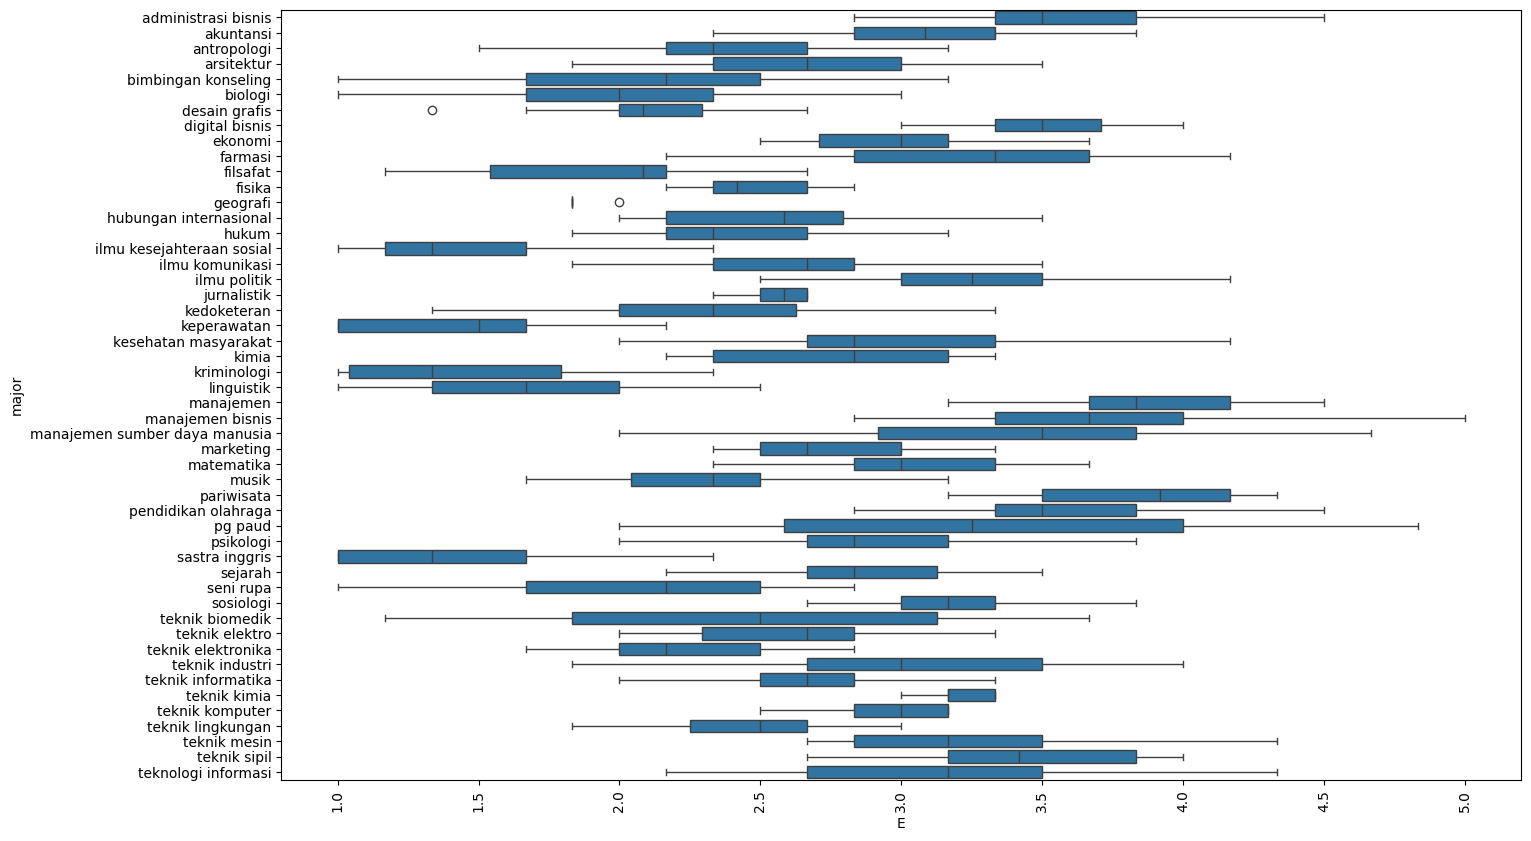

(1895, 10)


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers(df):
    Q1 = df['E'].quantile(0.25)
    Q3 = df['E'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df['E'] >= Q1 - 1.5 * IQR) & (df['E'] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.boxplot(x='E', y='major', data=filtered_df)
plt.xticks(rotation=90)
plt.show()
print(filtered_df.shape)

C:\Users\Ngurah Ervan\AppData\Local\Temp\ipykernel_16360\2142506110.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)


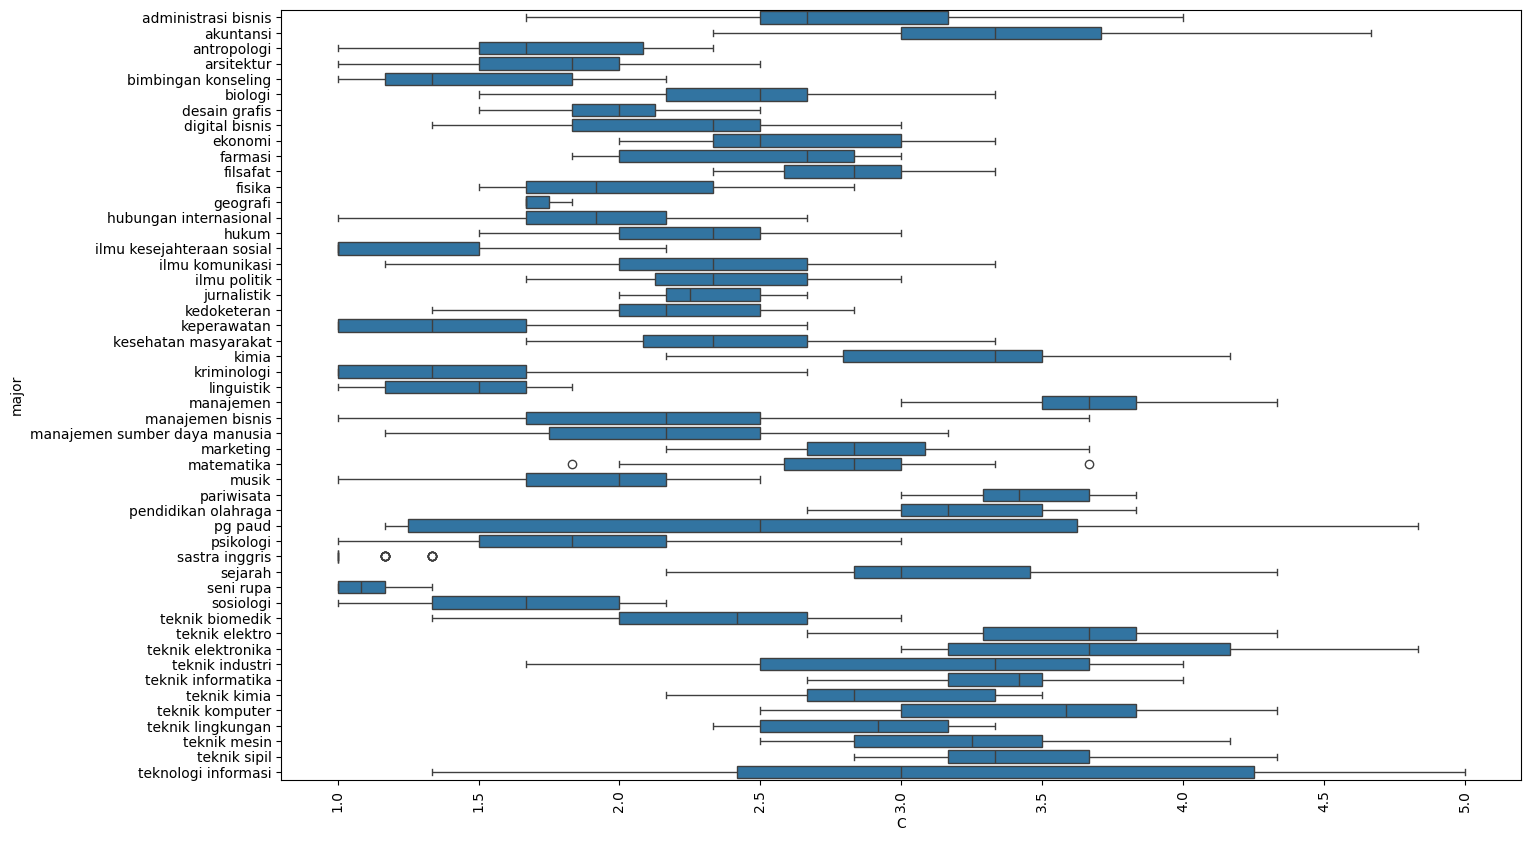

(1866, 10)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers(df):
    Q1 = df['C'].quantile(0.25)
    Q3 = df['C'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df['C'] >= Q1 - 1.5 * IQR) & (df['C'] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.boxplot(x='C', y='major', data=filtered_df)
plt.xticks(rotation=90)
plt.show()
print(filtered_df.shape)

## TIPI 

C:\Users\Ngurah Ervan\AppData\Local\Temp\ipykernel_16360\3216650733.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)


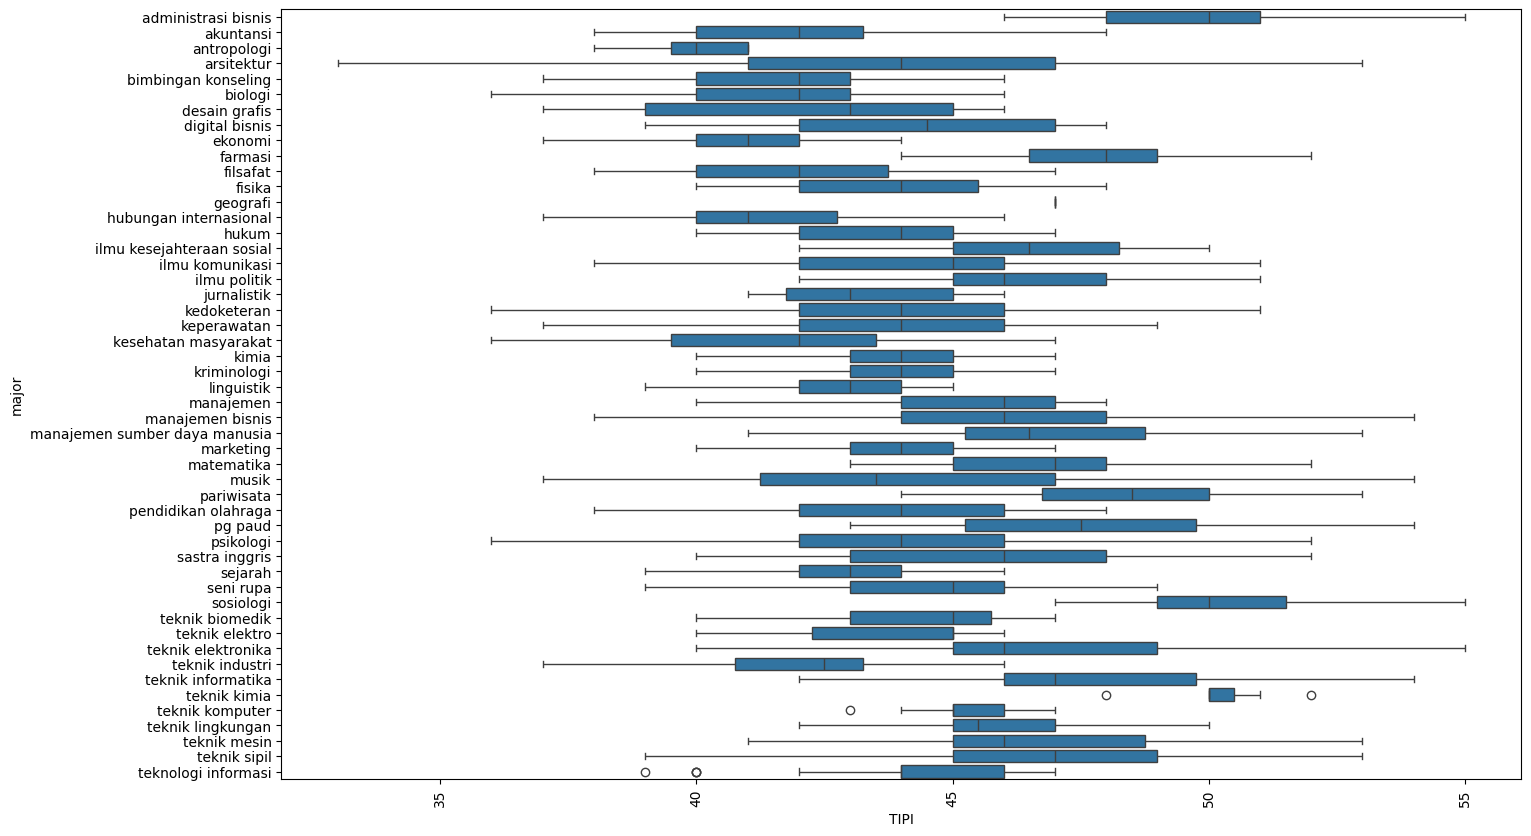

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def remove_outliers(df):
    Q1 = df['TIPI'].quantile(0.25)
    Q3 = df['TIPI'].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df['TIPI'] >= Q1 - 1.5 * IQR) & (df['TIPI'] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

filtered_df = filtered_df.groupby('major').apply(remove_outliers).reset_index(drop=True)

plt.figure(figsize=(16, 10))
sns.boxplot(x='TIPI', y='major', data=filtered_df)
plt.xticks(rotation=90)
plt.show()


In [35]:
# DISTRIBUSI AKHIR

print(filtered_df.value_counts('major'))
print(filtered_df.shape)

major
psikologi                        356
manajemen bisnis                 167
ilmu komunikasi                   85
biologi                           77
keperawatan                       73
kedoketeran                       68
akuntansi                         60
sastra inggris                    57
teknologi informasi               41
arsitektur                        41
ilmu politik                      40
administrasi bisnis               37
bimbingan konseling               33
seni rupa                         32
teknik sipil                      31
kesehatan masyarakat              31
musik                             30
teknik mesin                      30
teknik informatika                30
sejarah                           29
ilmu kesejahteraan sosial         28
matematika                        27
manajemen sumber daya manusia     26
ekonomi                           26
manajemen                         25
kriminologi                       25
marketing                       

---
---
## RESAMPLING TO REDUCE IMBALANCE (OPTIONAL)
---
---

---
---
## DEVELOP MODEL
---
---

In [36]:
# SPLIT DATASET

from sklearn.model_selection import train_test_split

trainbuild_df = filtered_df.copy()
X = trainbuild_df.drop(['major', 'cluster' ], axis=1)
y = trainbuild_df['major']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.columns)
print(X_train.shape)

Index(['R', 'I', 'A', 'S', 'E', 'C', 'VCL', 'TIPI'], dtype='object')
(1471, 8)


In [39]:
# TRADITIONAL MACHINE LEARNING

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy}')

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'SVM Accuracy: {svm_accuracy}')

# RandomForest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'RandomForest Accuracy: {rf_accuracy}')

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6440217391304348
SVM Accuracy: 0.20652173913043478
RandomForest Accuracy: 0.6956521739130435


In [40]:
#ENCODING
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.callbacks import Callback

# Assuming X_train, X_test, y_train_encoded, and y_test_encoded are defined
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_schedule = LearningRateScheduler(scheduler)

model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),  
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),  
    Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

optimizer = SGD(learning_rate=0.01, momentum=0.9)  
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.78:
            print("\nReached 78% validation accuracy so cancelling training!")
            self.model.stop_training = True


custom_callback = CustomCallback()


model.fit(X_train_scaled, y_train_encoded, epochs=500,
          validation_data=(X_test_scaled, y_test_encoded),
          callbacks=[ custom_callback])

model_accuracy = model.evaluate(X_test_scaled, y_test_encoded)[1]

y_pred_prob = model.predict(X_test_scaled[1:2])
y_pred = np.argmax(y_pred_prob, axis=1)

print("Accuracy:", model_accuracy)
print("Prediction:", y_pred)

Epoch 1/500


c:\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1490 - loss: 4.0893 - val_accuracy: 0.5190 - val_loss: 2.8739
Epoch 2/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4716 - loss: 2.2762 - val_accuracy: 0.5707 - val_loss: 2.3868
Epoch 3/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5090 - loss: 1.9501 - val_accuracy: 0.6223 - val_loss: 1.9784
Epoch 4/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5449 - loss: 1.7652 - val_accuracy: 0.6495 - val_loss: 1.6893
Epoch 5/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5733 - loss: 1.6569 - val_accuracy: 0.6875 - val_loss: 1.4762
Epoch 6/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5829 - loss: 1.6013 - val_accuracy: 0.6766 - val_loss: 1.3077
Epoch 7/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5889 - loss: 1.5570 - val_accuracy: 0.6984 - val_loss: 1.1999
Epoch 8/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5953 - loss: 1.4629 - val_accuracy: 0.7147 - val_loss: 1.1